In [726]:
import pandas as pd

In [727]:
df = pd.read_csv("GlobalTemperatures.csv")

In [728]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [729]:
df['dt'] = pd.to_datetime(df['dt'])

In [730]:
df['dt'] = pd.to_datetime(df['dt'])

In [731]:
df = df.dropna()

In [732]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
1200,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1201,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1202,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1203,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1204,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [733]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")   # built-in dark theme


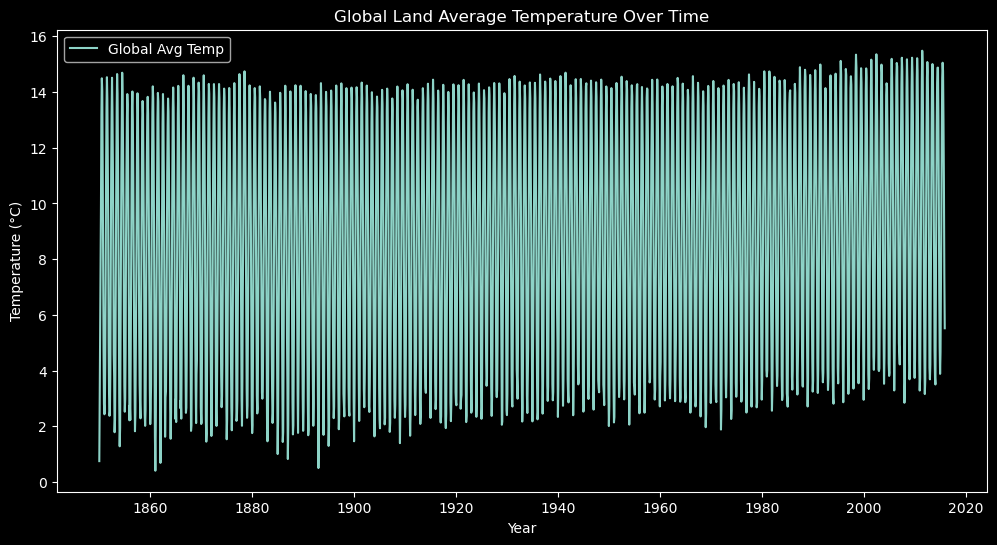

In [734]:
plt.figure(figsize=(12,6))
plt.plot(df['dt'], df['LandAverageTemperature'], label="Global Avg Temp")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Land Average Temperature Over Time")
plt.legend()
plt.show()

In [735]:
df['Year'] = df['dt'].dt.year

C:\Users\admin\AppData\Local\Temp\ipykernel_17380\607459253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['dt'].dt.year


In [736]:
from sklearn.model_selection import train_test_split

In [737]:
X = df[['Year']]
y = df['LandAverageTemperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [738]:
from sklearn.linear_model import LinearRegression

In [739]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [740]:
from sklearn.metrics import mean_squared_error, r2_score

In [741]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 17.1436070342278
R²: -0.005127292489808033


In [742]:
import numpy as np

In [743]:
future_years = np.arange(2025, 2051).reshape(-1,1)
future_preds = model.predict(future_years)

for year, temp in zip(future_years.flatten(), future_preds):
    print(year, round(temp, 2))

2025 9.09
2026 9.09
2027 9.1
2028 9.11
2029 9.11
2030 9.12
2031 9.12
2032 9.13
2033 9.14
2034 9.14
2035 9.15
2036 9.16
2037 9.16
2038 9.17
2039 9.17
2040 9.18
2041 9.19
2042 9.19
2043 9.2
2044 9.21
2045 9.21
2046 9.22
2047 9.23
2048 9.23
2049 9.24
2050 9.24


C:\Users\admin\anaconda3_ronit\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


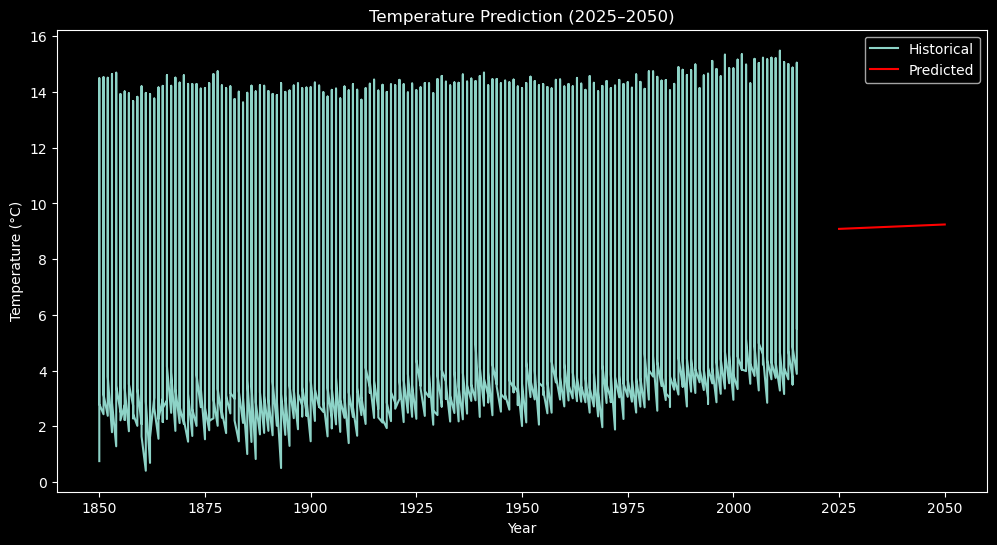

In [744]:
plt.figure(figsize=(12,6))
plt.plot(df['Year'], df['LandAverageTemperature'], label="Historical")
plt.plot(future_years, future_preds, label="Predicted", color="red")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Prediction (2025–2050)")
plt.legend()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17380\4025174132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Century'] = (df['Year'] // 100) * 100


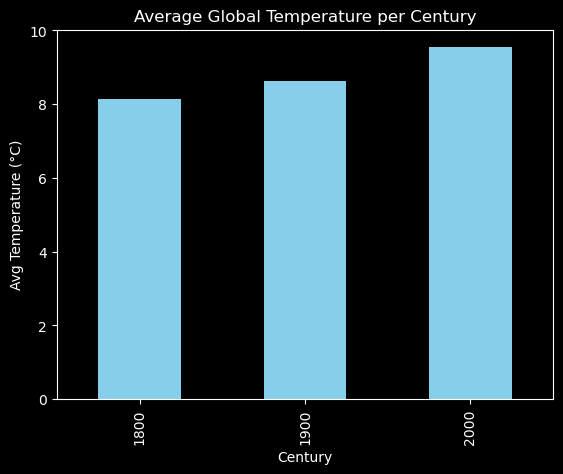

In [745]:
df['Century'] = (df['Year'] // 100) * 100
century_avg = df.groupby('Century')['LandAverageTemperature'].mean()

century_avg.plot(kind='bar', color='skyblue')
plt.xlabel("Century")
plt.ylabel("Avg Temperature (°C)")
plt.title("Average Global Temperature per Century")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17380\3907238385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['dt'].dt.month


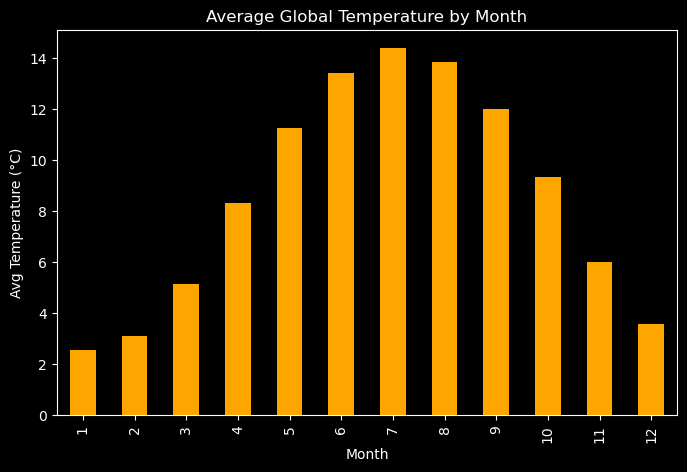

In [746]:
df['Month'] = df['dt'].dt.month
monthly_avg = df.groupby('Month')['LandAverageTemperature'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar', color='orange')
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.title("Average Global Temperature by Month")
plt.show()


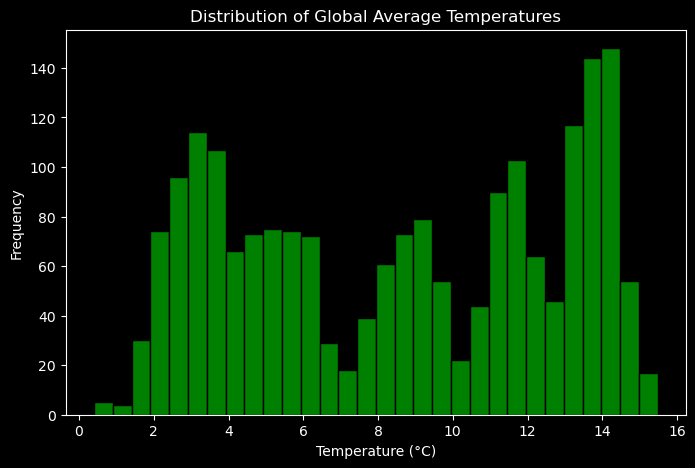

In [747]:
plt.figure(figsize=(8,5))
plt.hist(df['LandAverageTemperature'], bins=30, color='green', edgecolor='black')
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Global Average Temperatures")
plt.show()


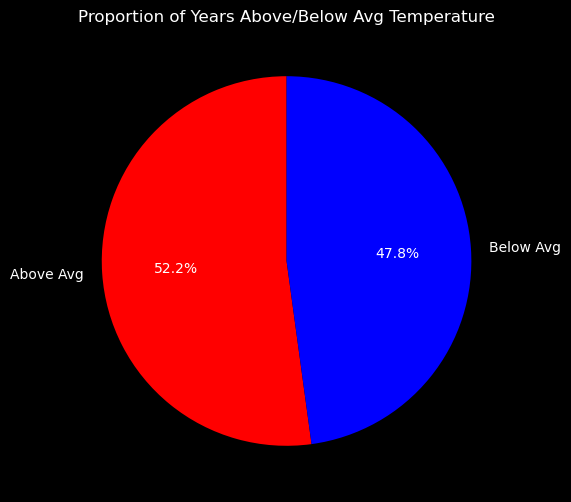

In [748]:
mean_temp = df['LandAverageTemperature'].mean()
above_avg = (df['LandAverageTemperature'] > mean_temp).sum()
below_avg = (df['LandAverageTemperature'] <= mean_temp).sum()

plt.figure(figsize=(6,6))
plt.pie([above_avg, below_avg], labels=["Above Avg", "Below Avg"], 
        autopct='%1.1f%%', colors=['red','blue'], startangle=90)
plt.title("Proportion of Years Above/Below Avg Temperature")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17380\1455924949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rolling10'] = df['LandAverageTemperature'].rolling(window=120).mean()  # 10 years ~ 120 months


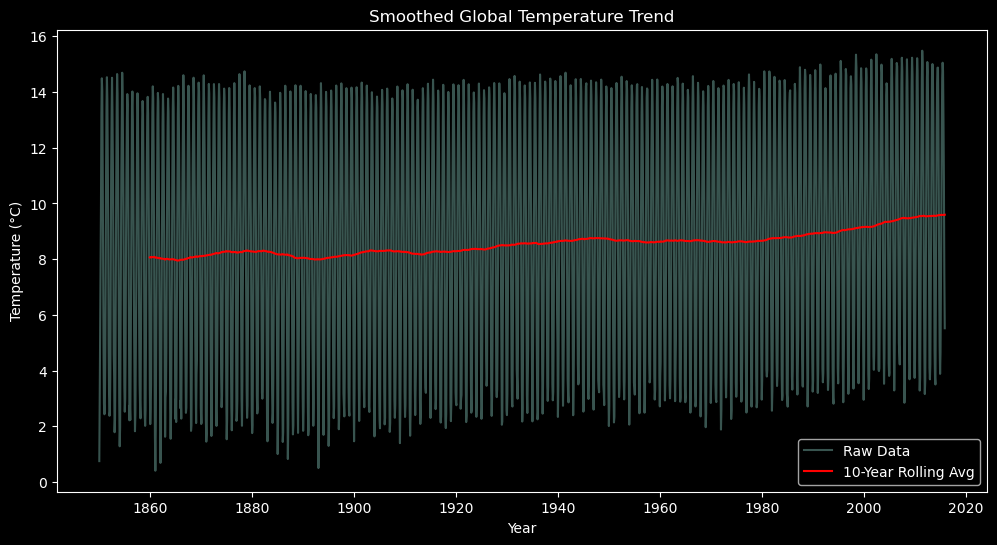

In [749]:
df['Rolling10'] = df['LandAverageTemperature'].rolling(window=120).mean()  # 10 years ~ 120 months
plt.figure(figsize=(12,6))
plt.plot(df['dt'], df['LandAverageTemperature'], alpha=0.4, label="Raw Data")
plt.plot(df['dt'], df['Rolling10'], color='red', label="10-Year Rolling Avg")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Smoothed Global Temperature Trend")
plt.legend()
plt.show()